In [18]:
import matplotlib as mpl
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from retrospective_analysis.metrics import max_error, mean_difference
from retrospective_analysis.data_loading import load_dataframe, moving_average, add_baselines
from retrospective_analysis.evaluate_scenarios import compute_metrics, compute_metrics_all_scenarios, evaluate_all_scenarios

In [19]:
# to change with path suited for you 
results_path = 'results/'
images_path = 'images/'

# divide by 100 to express as % of normalization
new_hosp_normalization = 3040/100 # based on data from Paireau et al. publication 
icu_normalization = 7000/100 
idf_icu_normalization  = 2600/100

metrics = {"MAE": mean_absolute_error, "ME": mean_difference,  
           "Max Error": max_error}

scenario_endpoints = ["ICU", "ICU", "New hosp.", "New hosp.", "New hosp.",
                      "New hosp.", "New hosp.", "New hosp.",
                      "ICU", "ICU", "New hosp.", "New hosp.", "ICU",  "New hosp.", "New hosp.","ICU"]

endpoints_normalizations = {"ICU": 7000/100, 
                            "idf_icu_normalization" : 2600/100,
                            "New hosp.": 4200/100}

data_location = {"2020/04/28 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_04_28_ICU_error.csv",
        "2020/10/30 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2020_10_30_ICU_error.csv",
        "2021/01/16": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_01_16_new_hosp_error.csv",
        "2021/02/02": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_02_new_hosp_error.csv",
        "2021/02/08": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_08_new_hosp_error.csv",
        "2021/02/23": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_02_23_new_hosp_error.csv",
        "2021/04/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_04_26_new_hosp_error.csv",
        "2021/05/21": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_05_21_new_hosp_error.csv",
        "2021/05/21 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_05_21_ICU_error.csv",
        "2021/07/26 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_07_26_ICU_error.csv",
        "2021/07/26": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_07_26_new_hosp_error.csv",
        "2021/08/05": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_08_05_new_hosp_error.csv",
        "2021/08/05 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2021_08_05_ICU_error.csv",
        "2021/10/04": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2021_10_04_new_hosp_error.csv",
        "2022/01/07": "data_preparation/_site/output_data/min_med_max_and_error/new_hosp_error/2022_01_07_new_hosp_error.csv",
        "2022/01/07 ICU": "data_preparation/_site/output_data/min_med_max_and_error/ICU_error/2022_01_07_ICU_error.csv"}

normalizations = {"2020/04/28 ICU": idf_icu_normalization,
        "2020/10/30 ICU": icu_normalization,
        "2021/01/16": new_hosp_normalization,
        "2021/02/02": new_hosp_normalization,
        "2021/02/08": new_hosp_normalization,
        "2021/02/23": new_hosp_normalization,
        "2021/04/26": new_hosp_normalization,
        "2021/05/21": new_hosp_normalization,
        "2021/05/21 ICU": icu_normalization,
        "2021/07/26 ICU": icu_normalization,
        "2021/07/26": new_hosp_normalization,
        "2021/08/05": new_hosp_normalization,
        "2021/08/05 ICU": icu_normalization,
        "2021/10/04": new_hosp_normalization,
        "2022/01/07": new_hosp_normalization,
        "2022/01/07 ICU": icu_normalization}




In [20]:
# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize' : 30,
    'axes.labelsize' : 30,
    'legend.fontsize' : 30,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 30,
            'axes.labelsize' : 30,
            'legend.fontsize' : 30,
            'xtick.labelsize' : 30,
            'ytick.labelsize' : 30,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline

In [21]:
len(scenario_endpoints)

16

In [22]:
df_low_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name = "min")
df_low_scenario["endpoints"] = scenario_endpoints
df_low_scenario["MAE (beds)"] = df_low_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_low_scenario["Max error (beds)"] = df_low_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

with open(results_path + 'low_scenario.csv', 'w', encoding = 'utf-8-sig') as f:
    df_low_scenario.to_csv(f)

print(df_low_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &    ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/28 ICU ICU   &  3.8 &  -1.7 &        6.1 &  17.8 &        ICU &       266.0 &             427.0 \\
Scenario: 2020/10/30 ICU ICU   &  8.0 &   0.6 &       17.8 &  15.2 &        ICU &       560.0 &            1246.0 \\
Scenario: 2021/01/16 New hosp. &  7.7 &   2.9 &       20.0 &  18.1 &  New hosp. &       323.4 &             840.0 \\
Scenario: 2021/02/02 New hosp. & 10.0 &  10.0 &       23.0 &  24.1 &  New hosp. &       420.0 &             966.0 \\
Scenario: 2021/02/08 New hosp. & 14.4 &  14.4 &       26.2 &  34.6 &  New hosp. &       604.8 &            1100.4 \\
Scenario: 2021/02/23 New hosp. & 17.3 & -17.3 &       25.1 &  40.1 &  New hosp. &       726.6 &            1054.2 \\
Scenario: 2021/04/26 New hosp. &  7.3 &   7.3 &        9.3 &  52.9 &  New hosp. &       306.6 &             390.6 \\
Scenario: 2021/05/21 New hosp. &  4.1 &  -4.1 & 

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_18873/604071543.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_low_scenario.to_latex(


In [23]:
fig, axes = plt.subplots(figsize=(18, 9), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape
display_df = df_low_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Prediction error (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')

plt.ylabel("")
    
fig_path = images_path + '/error_beds_low.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

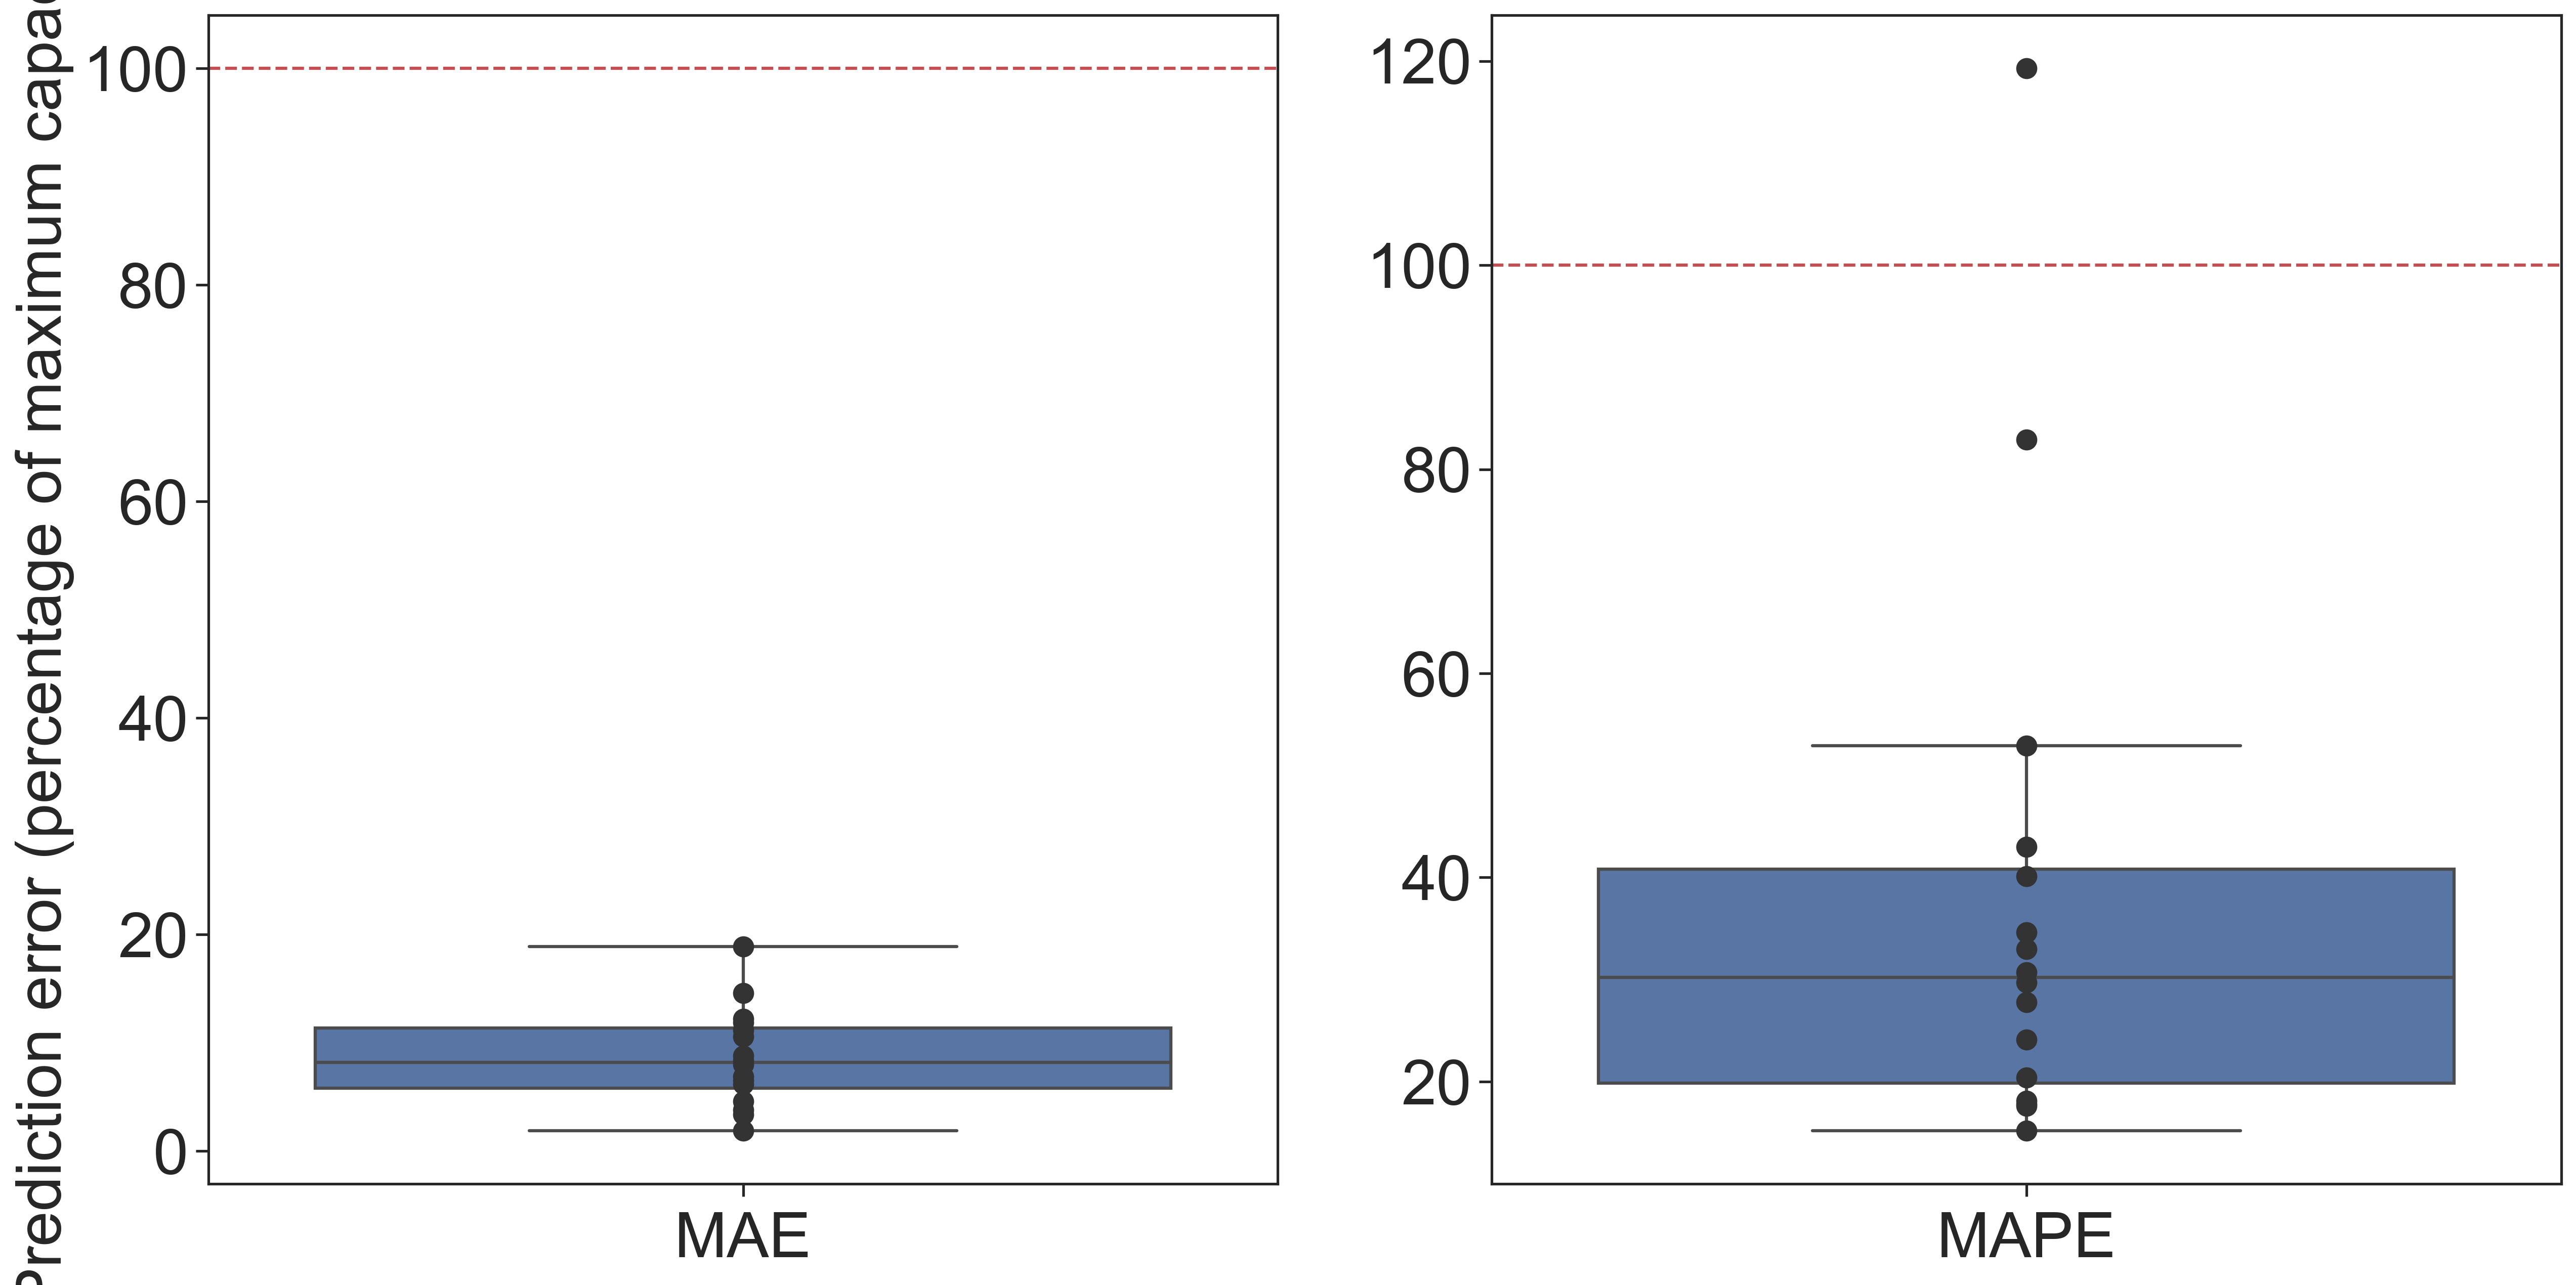

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_low_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_low_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

h = sns.boxplot(data=df_low_scenario, y='MAPE',  ax=axes[1])
sns.stripplot(data=df_low_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_low_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

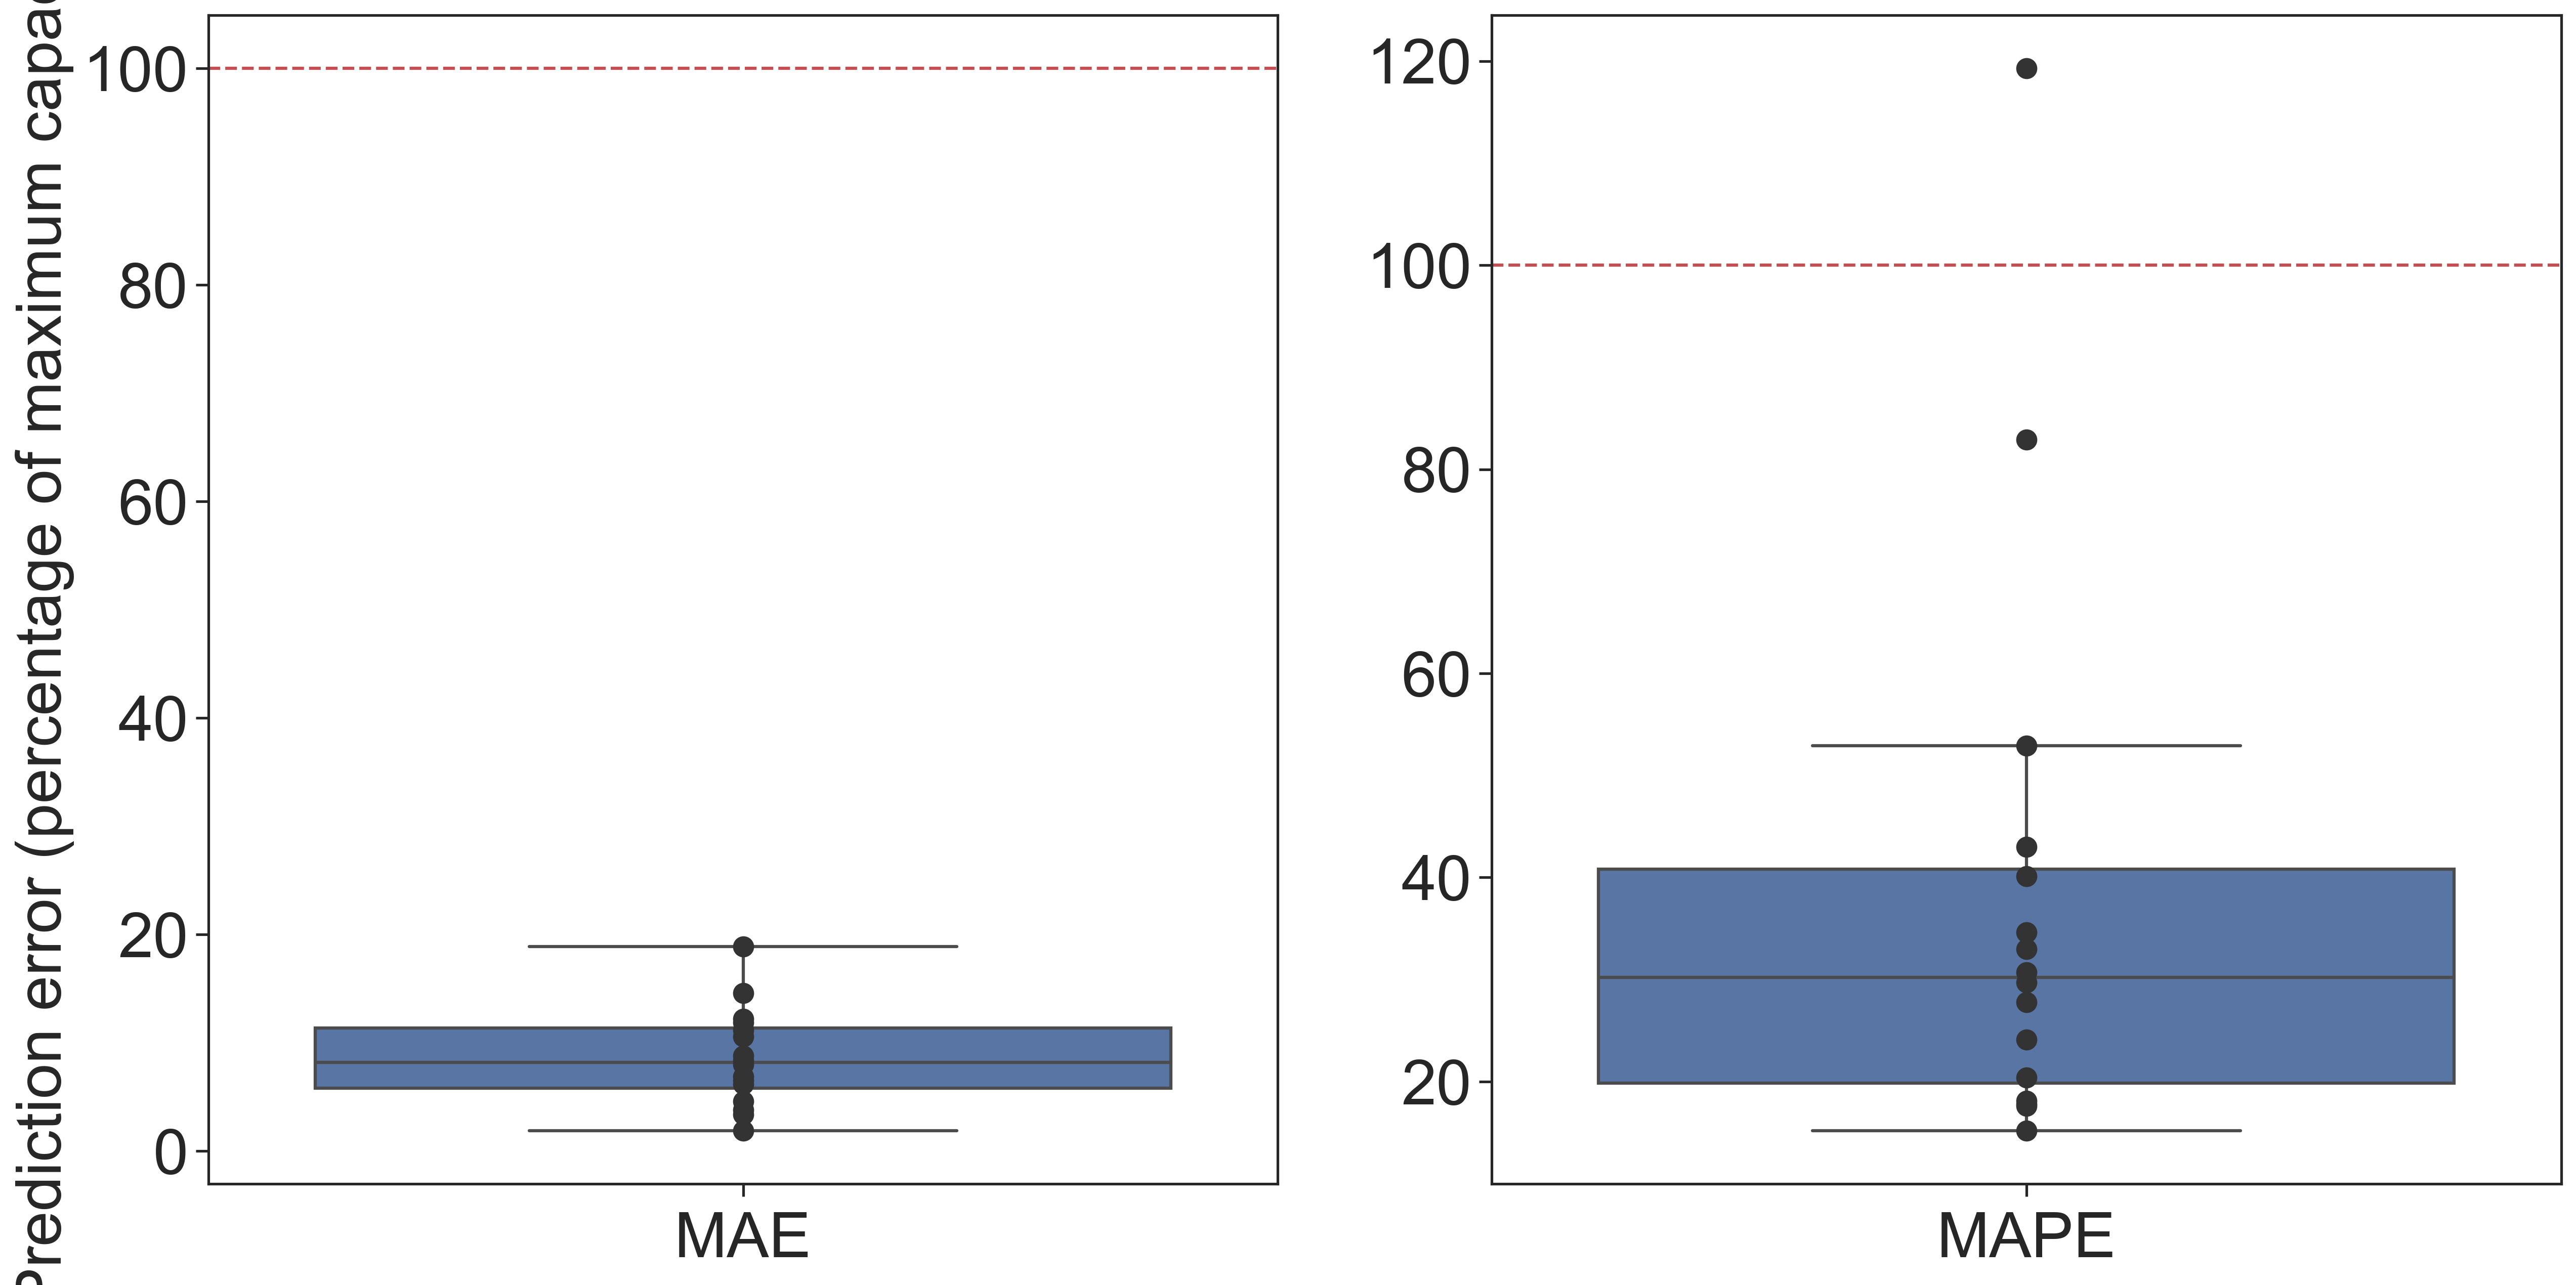

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


sns.boxplot(data=df_low_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_low_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

sns.boxplot(data=df_low_scenario, y='MAPE',  ax=axes[1])
sns.stripplot(data=df_low_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_low_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [ ]:
df_median_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name="med")
df_median_scenario["endpoints"] = scenario_endpoints
df_median_scenario["MAE (beds)"] = df_median_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_median_scenario["Max error (beds)"] = df_median_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

with open(results_path + 'median_scenario.csv', 'w', encoding = 'utf-8-sig') as f:
    df_median_scenario.to_csv(f)
    
print(df_median_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &    ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/28 ICU ICU   &  7.0 &   2.1 &       25.9 &  43.2 &        ICU &       490.0 &            1813.0 \\
Scenario: 2020/10/30 ICU ICU   & 19.0 &  19.0 &       25.8 &  35.0 &        ICU &      1330.0 &            1806.0 \\
Scenario: 2021/01/16 New hosp. & 25.5 &  23.8 &       85.1 &  72.7 &  New hosp. &      1071.0 &            3574.2 \\
Scenario: 2021/02/02 New hosp. & 23.3 &  23.3 &       48.8 &  67.3 &  New hosp. &       978.6 &            2049.6 \\
Scenario: 2021/02/08 New hosp. & 20.6 &  20.6 &       31.5 &  59.4 &  New hosp. &       865.2 &            1323.0 \\
Scenario: 2021/02/23 New hosp. & 11.4 & -11.4 &       14.5 &  31.8 &  New hosp. &       478.8 &             609.0 \\
Scenario: 2021/04/26 New hosp. & 12.0 &  12.0 &       15.2 & 115.4 &  New hosp. &       504.0 &             638.4 \\
Scenario: 2021/05/21 New hosp. &  1.7 &  -1.3 & 

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_18873/1707219533.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_median_scenario.to_latex(


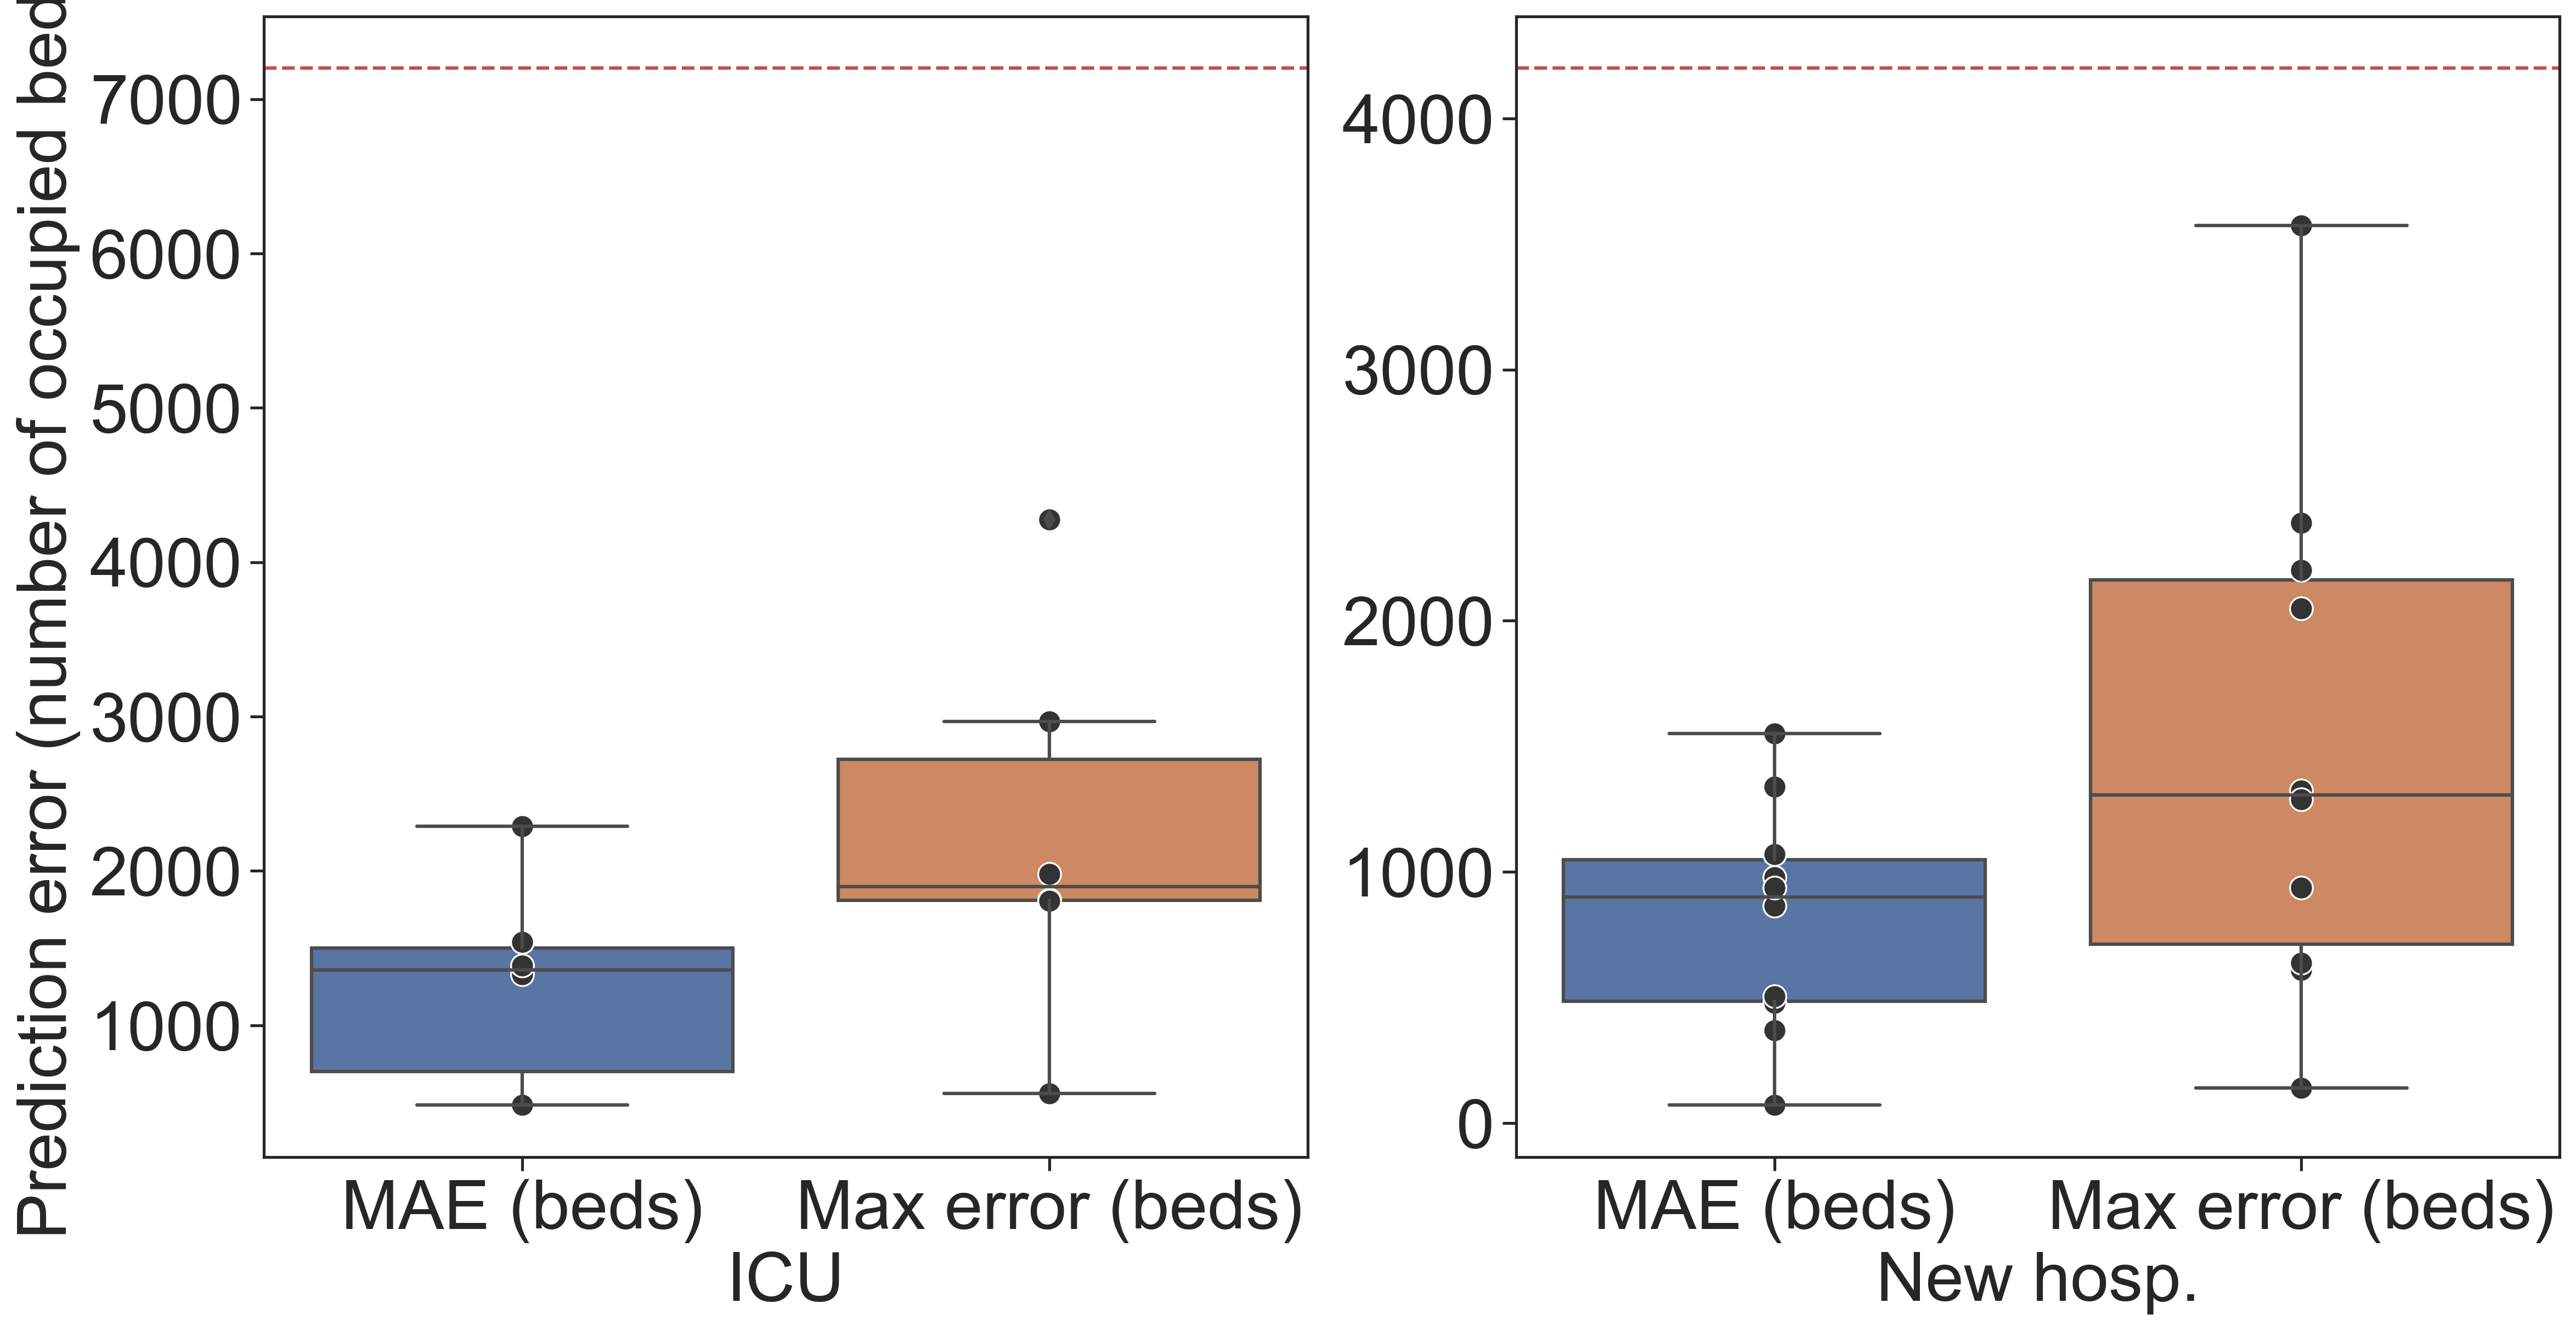

In [ ]:
fig, axes = plt.subplots(figsize=(18, 9), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape
display_df = df_median_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Prediction error (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')

plt.ylabel("")
    
fig_path = images_path + '/error_beds_median.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

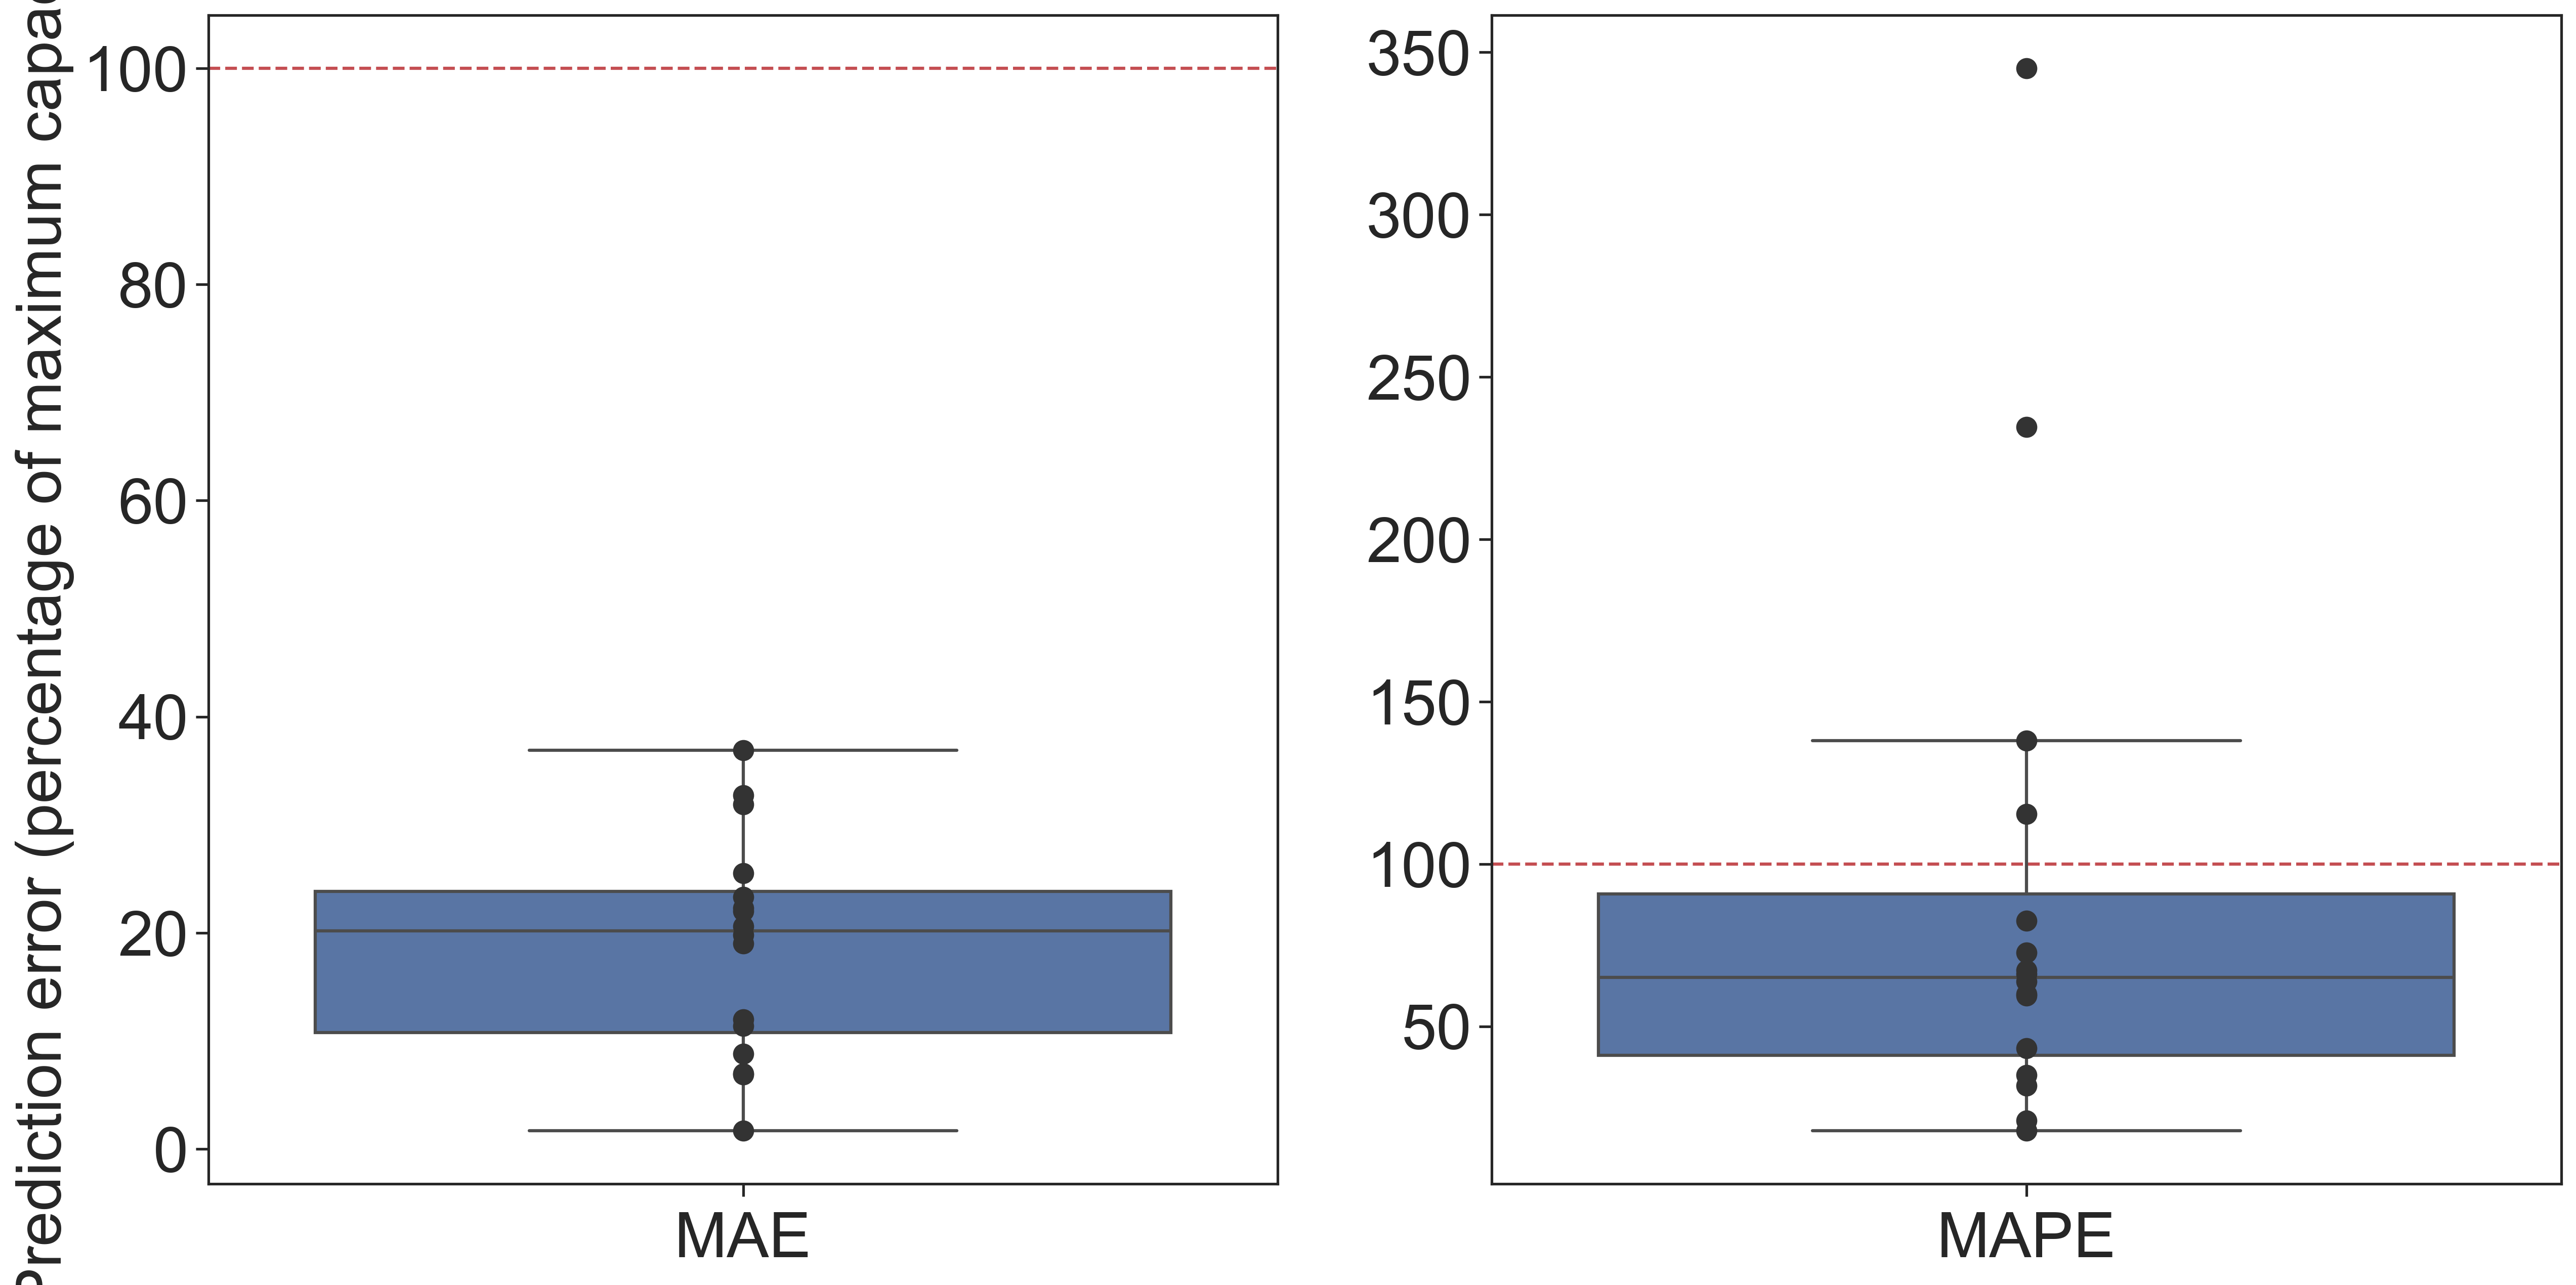

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_median_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_median_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

h = sns.boxplot(data=df_median_scenario, y='MAPE',  ax=axes[1])
sns.stripplot(data=df_median_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_median_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [ ]:
df_high_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name="max")
df_high_scenario["endpoints"] = scenario_endpoints
df_high_scenario["MAE (beds)"] = df_high_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_high_scenario["Max error (beds)"] = df_high_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

with open(results_path + 'high_scenario.csv', 'w', encoding = 'utf-8-sig') as f:
    df_high_scenario.to_csv(f)

print(df_high_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &   ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/28 ICU ICU   & 23.1 & 18.4 &       94.4 & 166.9 &        ICU &      1617.0 &            6608.0 \\
Scenario: 2020/10/30 ICU ICU   & 48.5 & 48.5 &       83.5 &  96.5 &        ICU &      3395.0 &            5845.0 \\
Scenario: 2021/01/16 New hosp. & 49.1 & 48.9 &      106.0 & 144.0 &  New hosp. &      2062.2 &            4452.0 \\
Scenario: 2021/02/02 New hosp. & 39.8 & 39.8 &       78.1 & 115.2 &  New hosp. &      1671.6 &            3280.2 \\
Scenario: 2021/02/08 New hosp. & 34.0 & 34.0 &       54.4 &  99.8 &  New hosp. &      1428.0 &            2284.8 \\
Scenario: 2021/02/23 New hosp. &  8.1 &  3.4 &       25.7 &  21.5 &  New hosp. &       340.2 &            1079.4 \\
Scenario: 2021/04/26 New hosp. & 19.7 & 19.7 &       32.5 & 206.0 &  New hosp. &       827.4 &            1365.0 \\
Scenario: 2021/05/21 New hosp. &  2.7 &  0.9 &        6.

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_18873/2726003453.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_high_scenario.to_latex(


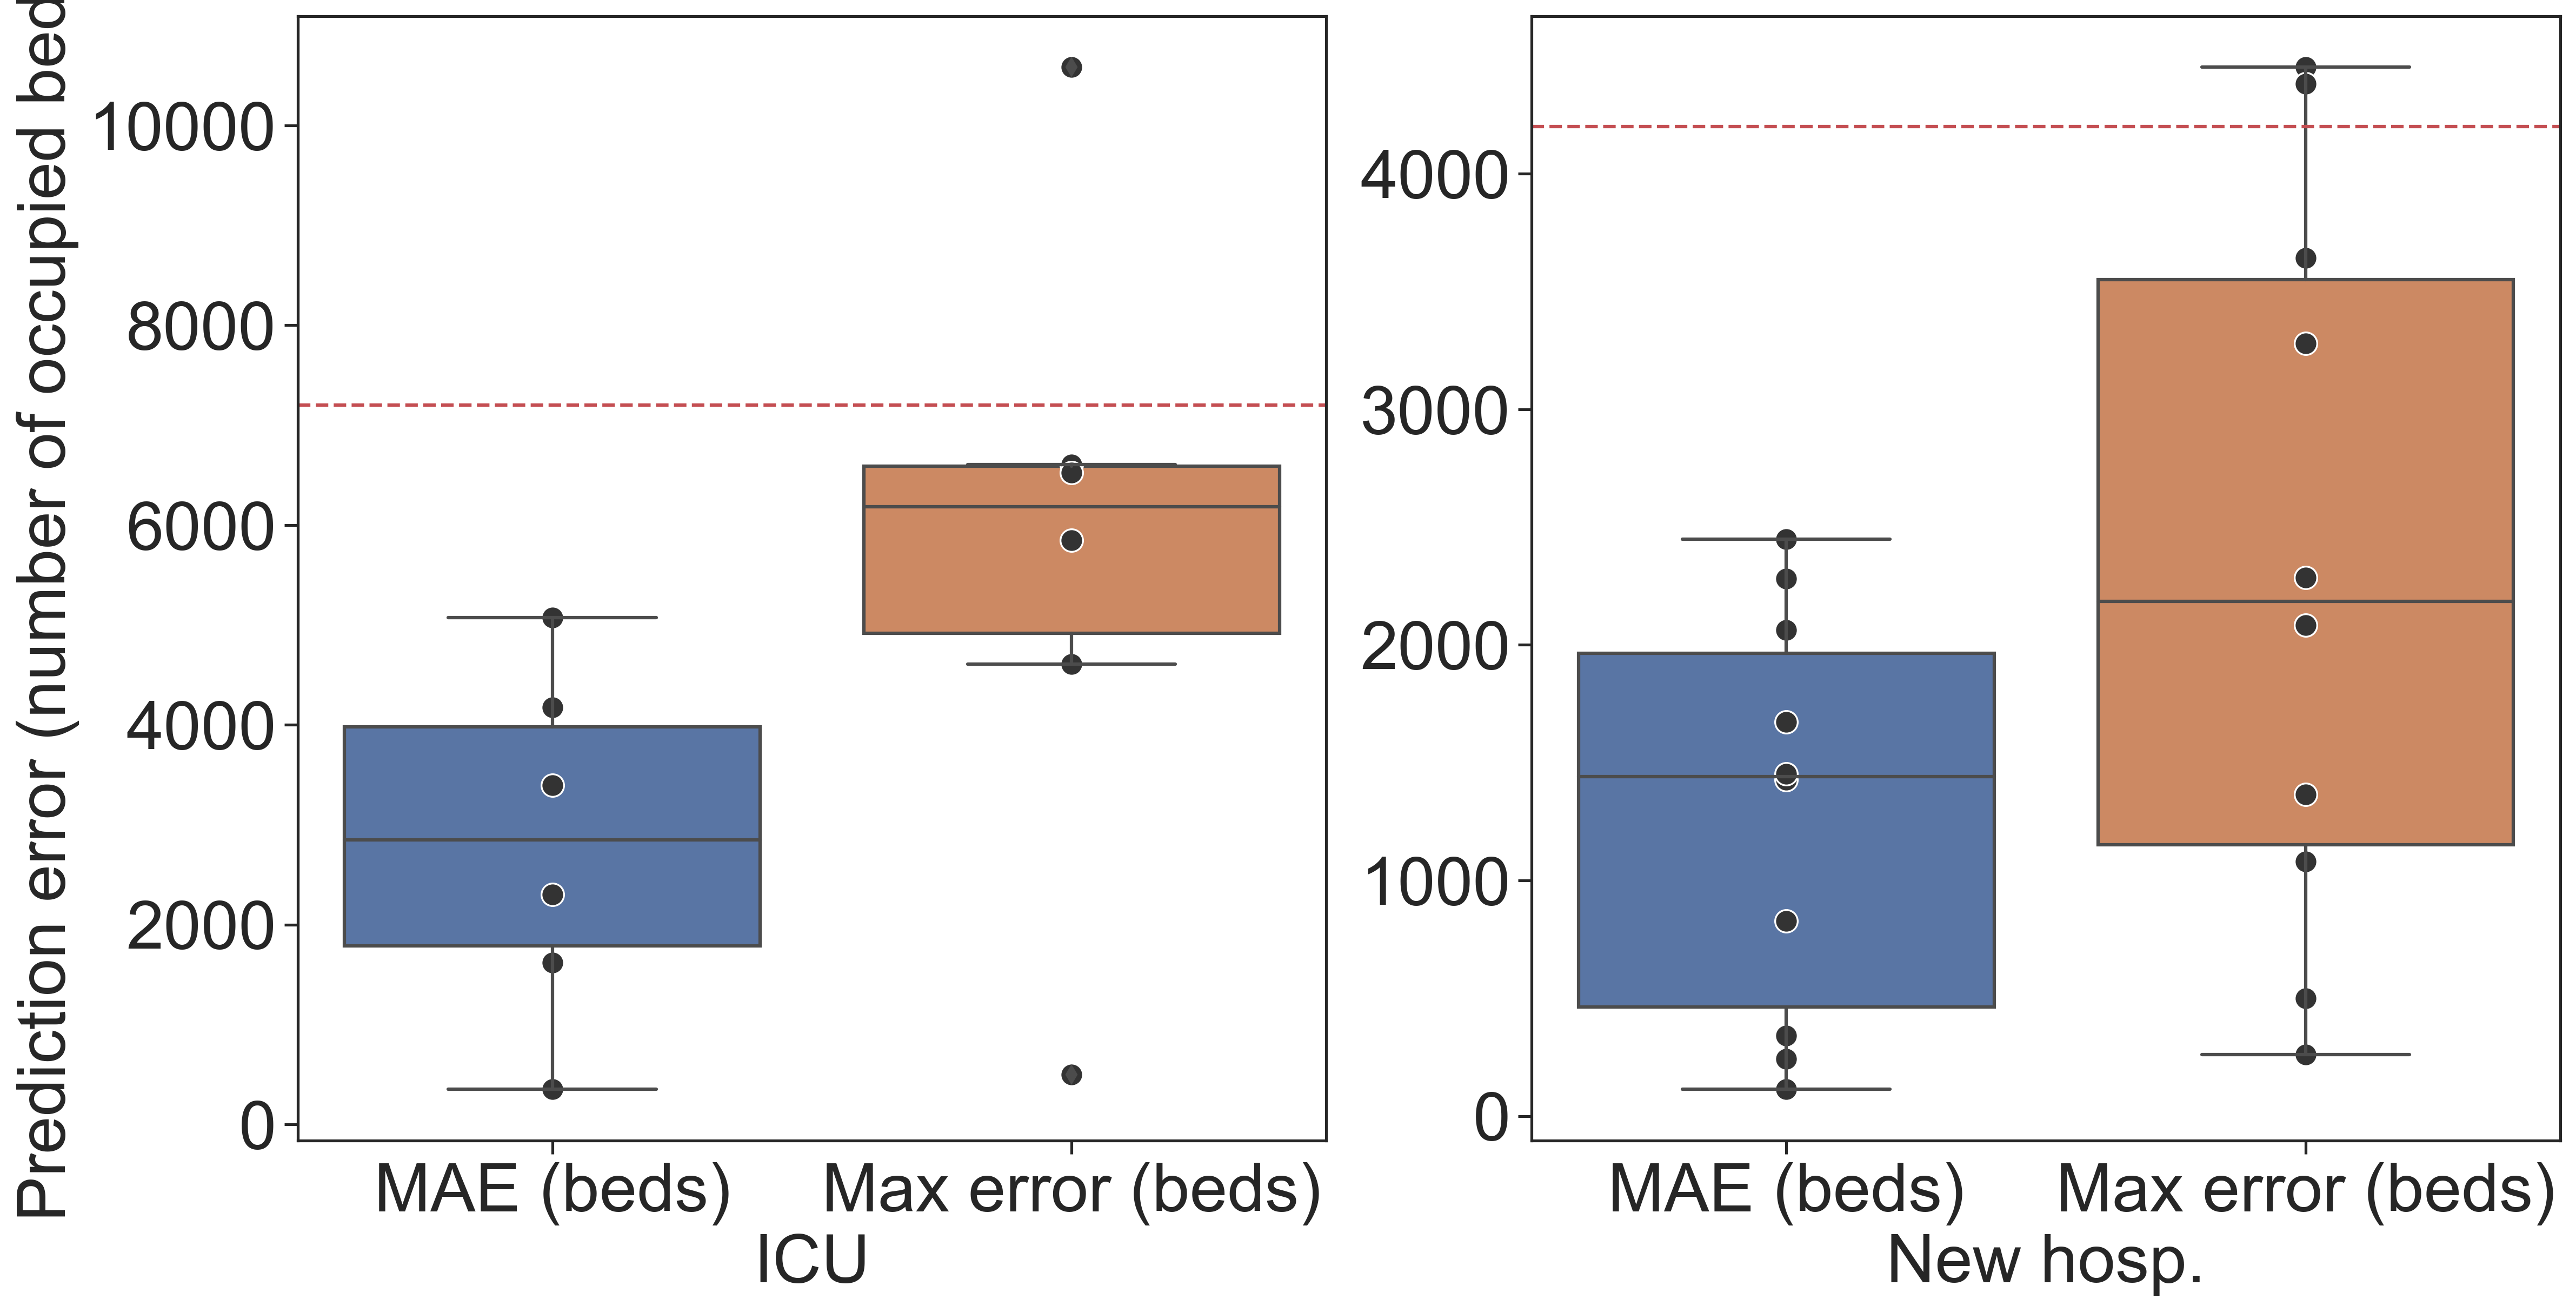

In [ ]:
fig, axes = plt.subplots(figsize=(18, 9), ncols=2, nrows=1)

# x2 avec mean + x2 avec mae + mape
display_df = df_high_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])

h1 = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0])
sns.scatterplot(data=display_df[display_df.endpoints=='ICU'], y='value', x='variable', ax=axes[0], s=100, color=".2")

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[0].set_xlabel("ICU")
axes[0].set_ylabel("Prediction error (number of occupied beds)")
axes[0].axhline(7200, c='r', linestyle='--')

h2 = sns.boxplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1])
sns.scatterplot(data=display_df[display_df.endpoints!='ICU'], y='value', x='variable', ax=axes[1], s=100, color=".2")
# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
axes[1].set_xlabel("New hosp.")
axes[1].axhline(4200, c='r', linestyle='--')

plt.ylabel("")
    
fig_path = images_path + '/error_beds_high.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

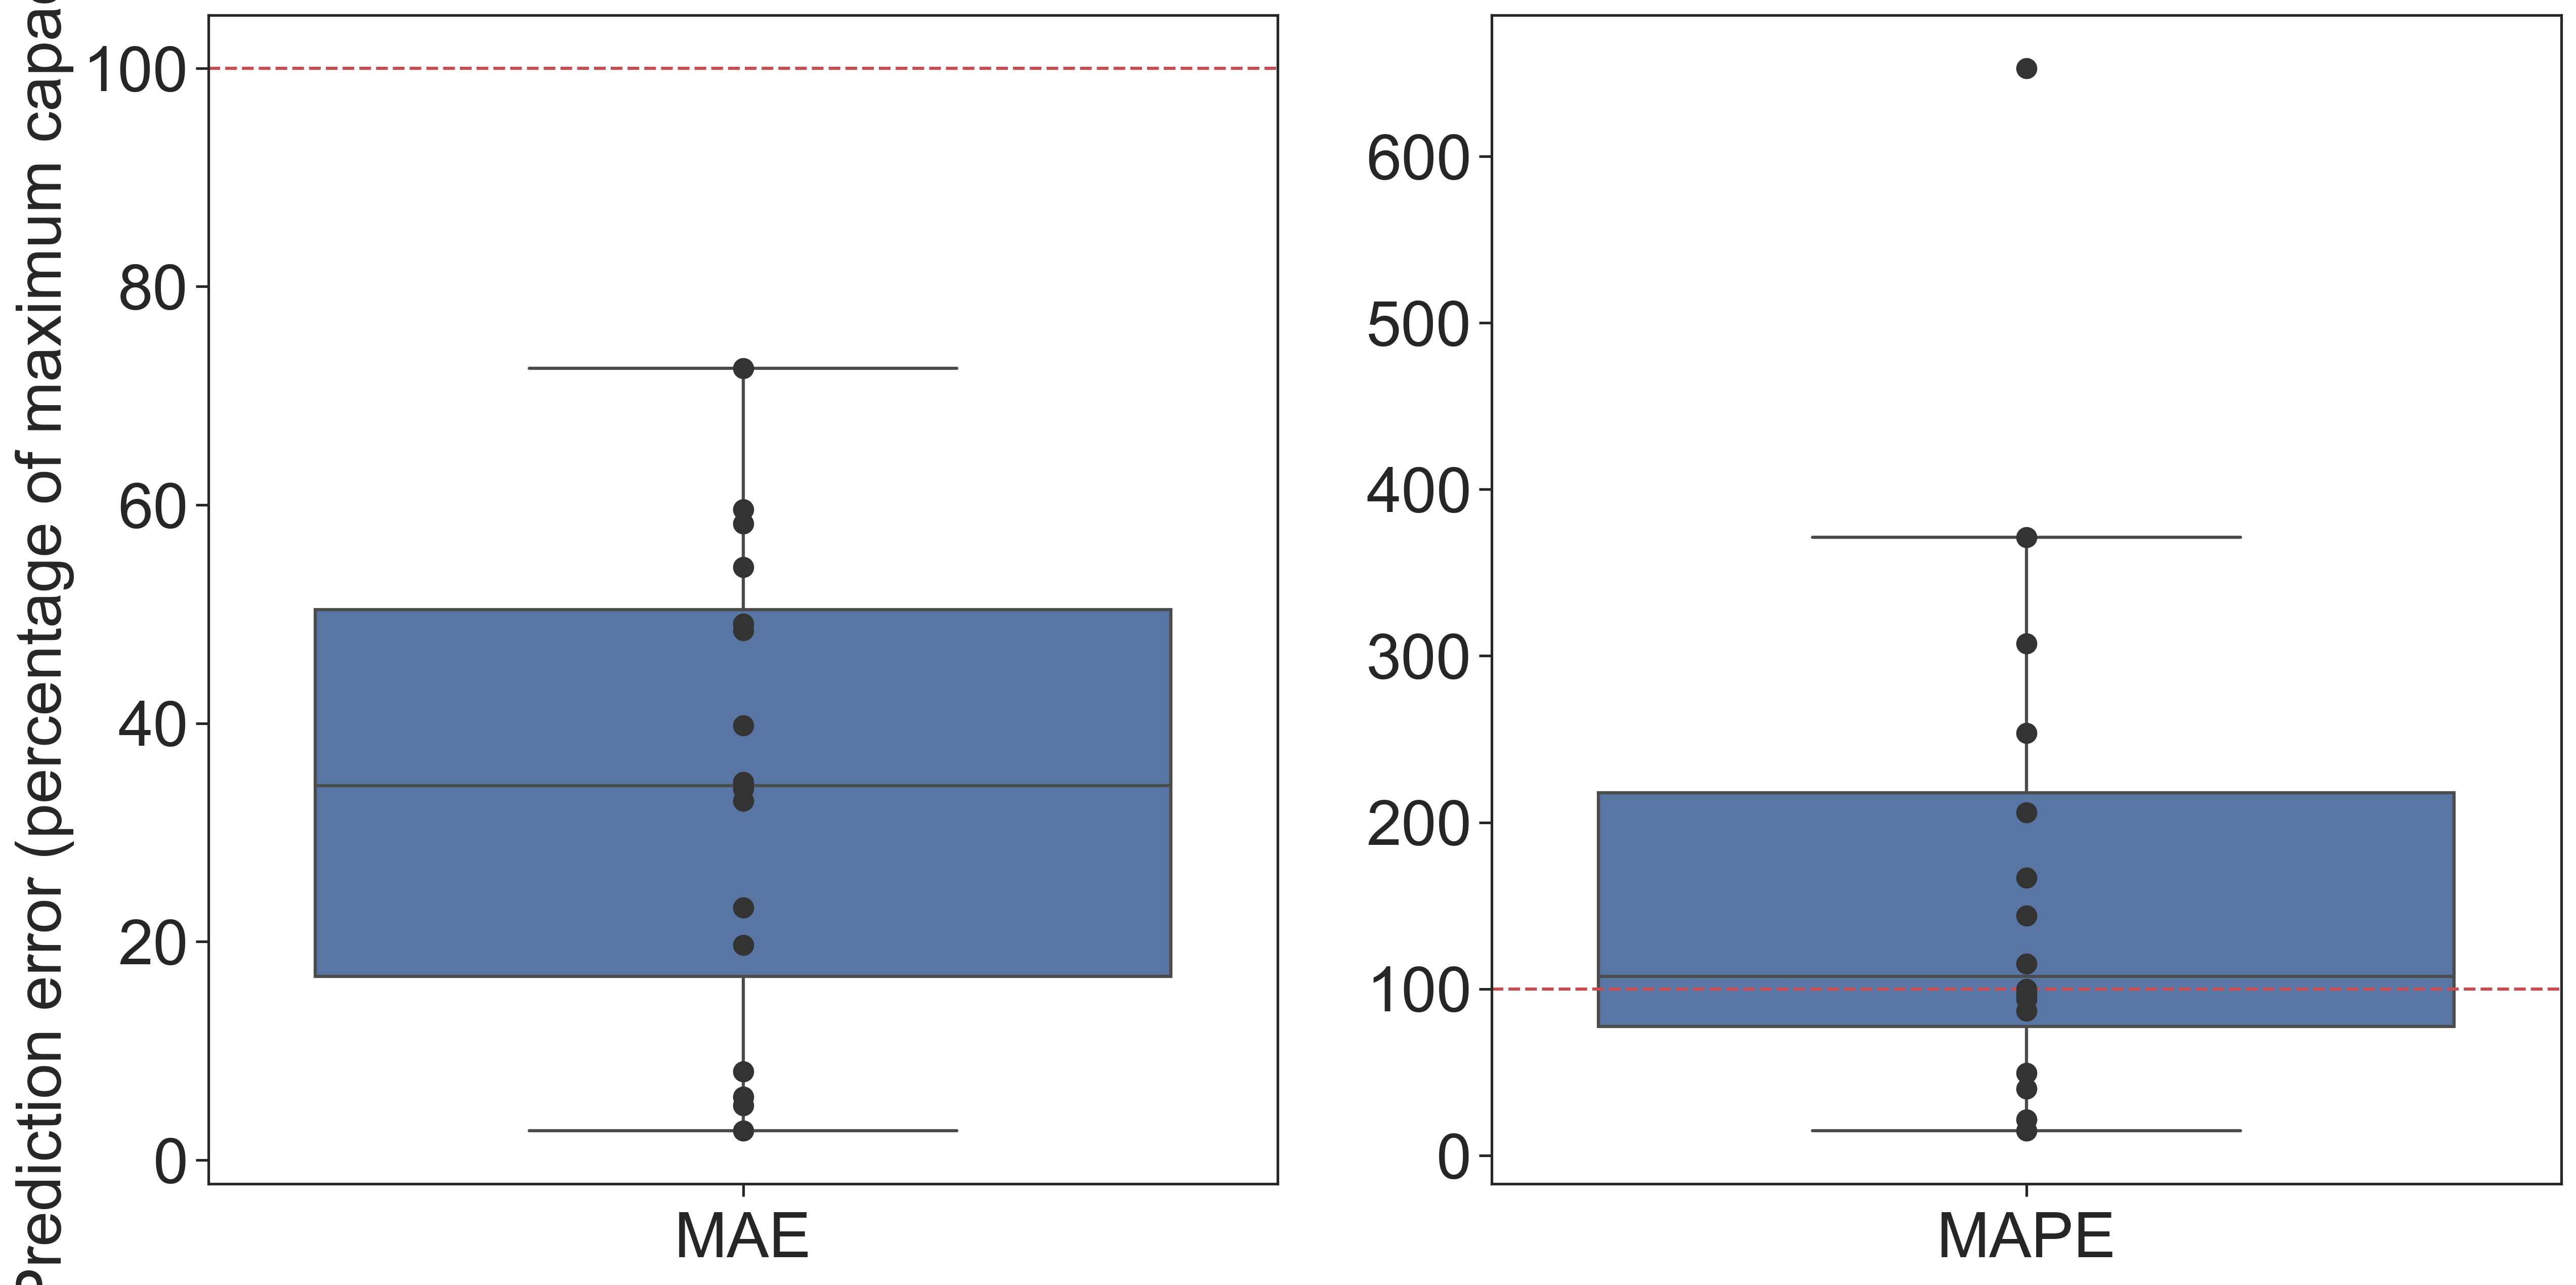

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_high_scenario, y='MAE',  ax=axes[0])
sns.stripplot(data=df_high_scenario, y='MAE',  ax=axes[0], s=10, color=".2", jitter=False)


axes[0].set_ylabel("Prediction error (percentage of maximum capacity)")
axes[0].axhline(y=100, linestyle='--', c='r')
axes[0].set_xlabel("MAE")

h = sns.boxplot(data=df_high_scenario, y='MAPE',  ax=axes[1])

sns.stripplot(data=df_high_scenario, y='MAPE',  ax=axes[1], s=10, color=".2", jitter=False)

axes[1].axhline(y=100, linestyle='--', c='r')
axes[1].set_xlabel("MAPE")
axes[1].set_ylabel("")

fig_path = images_path + '/error_beds_high_percent.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

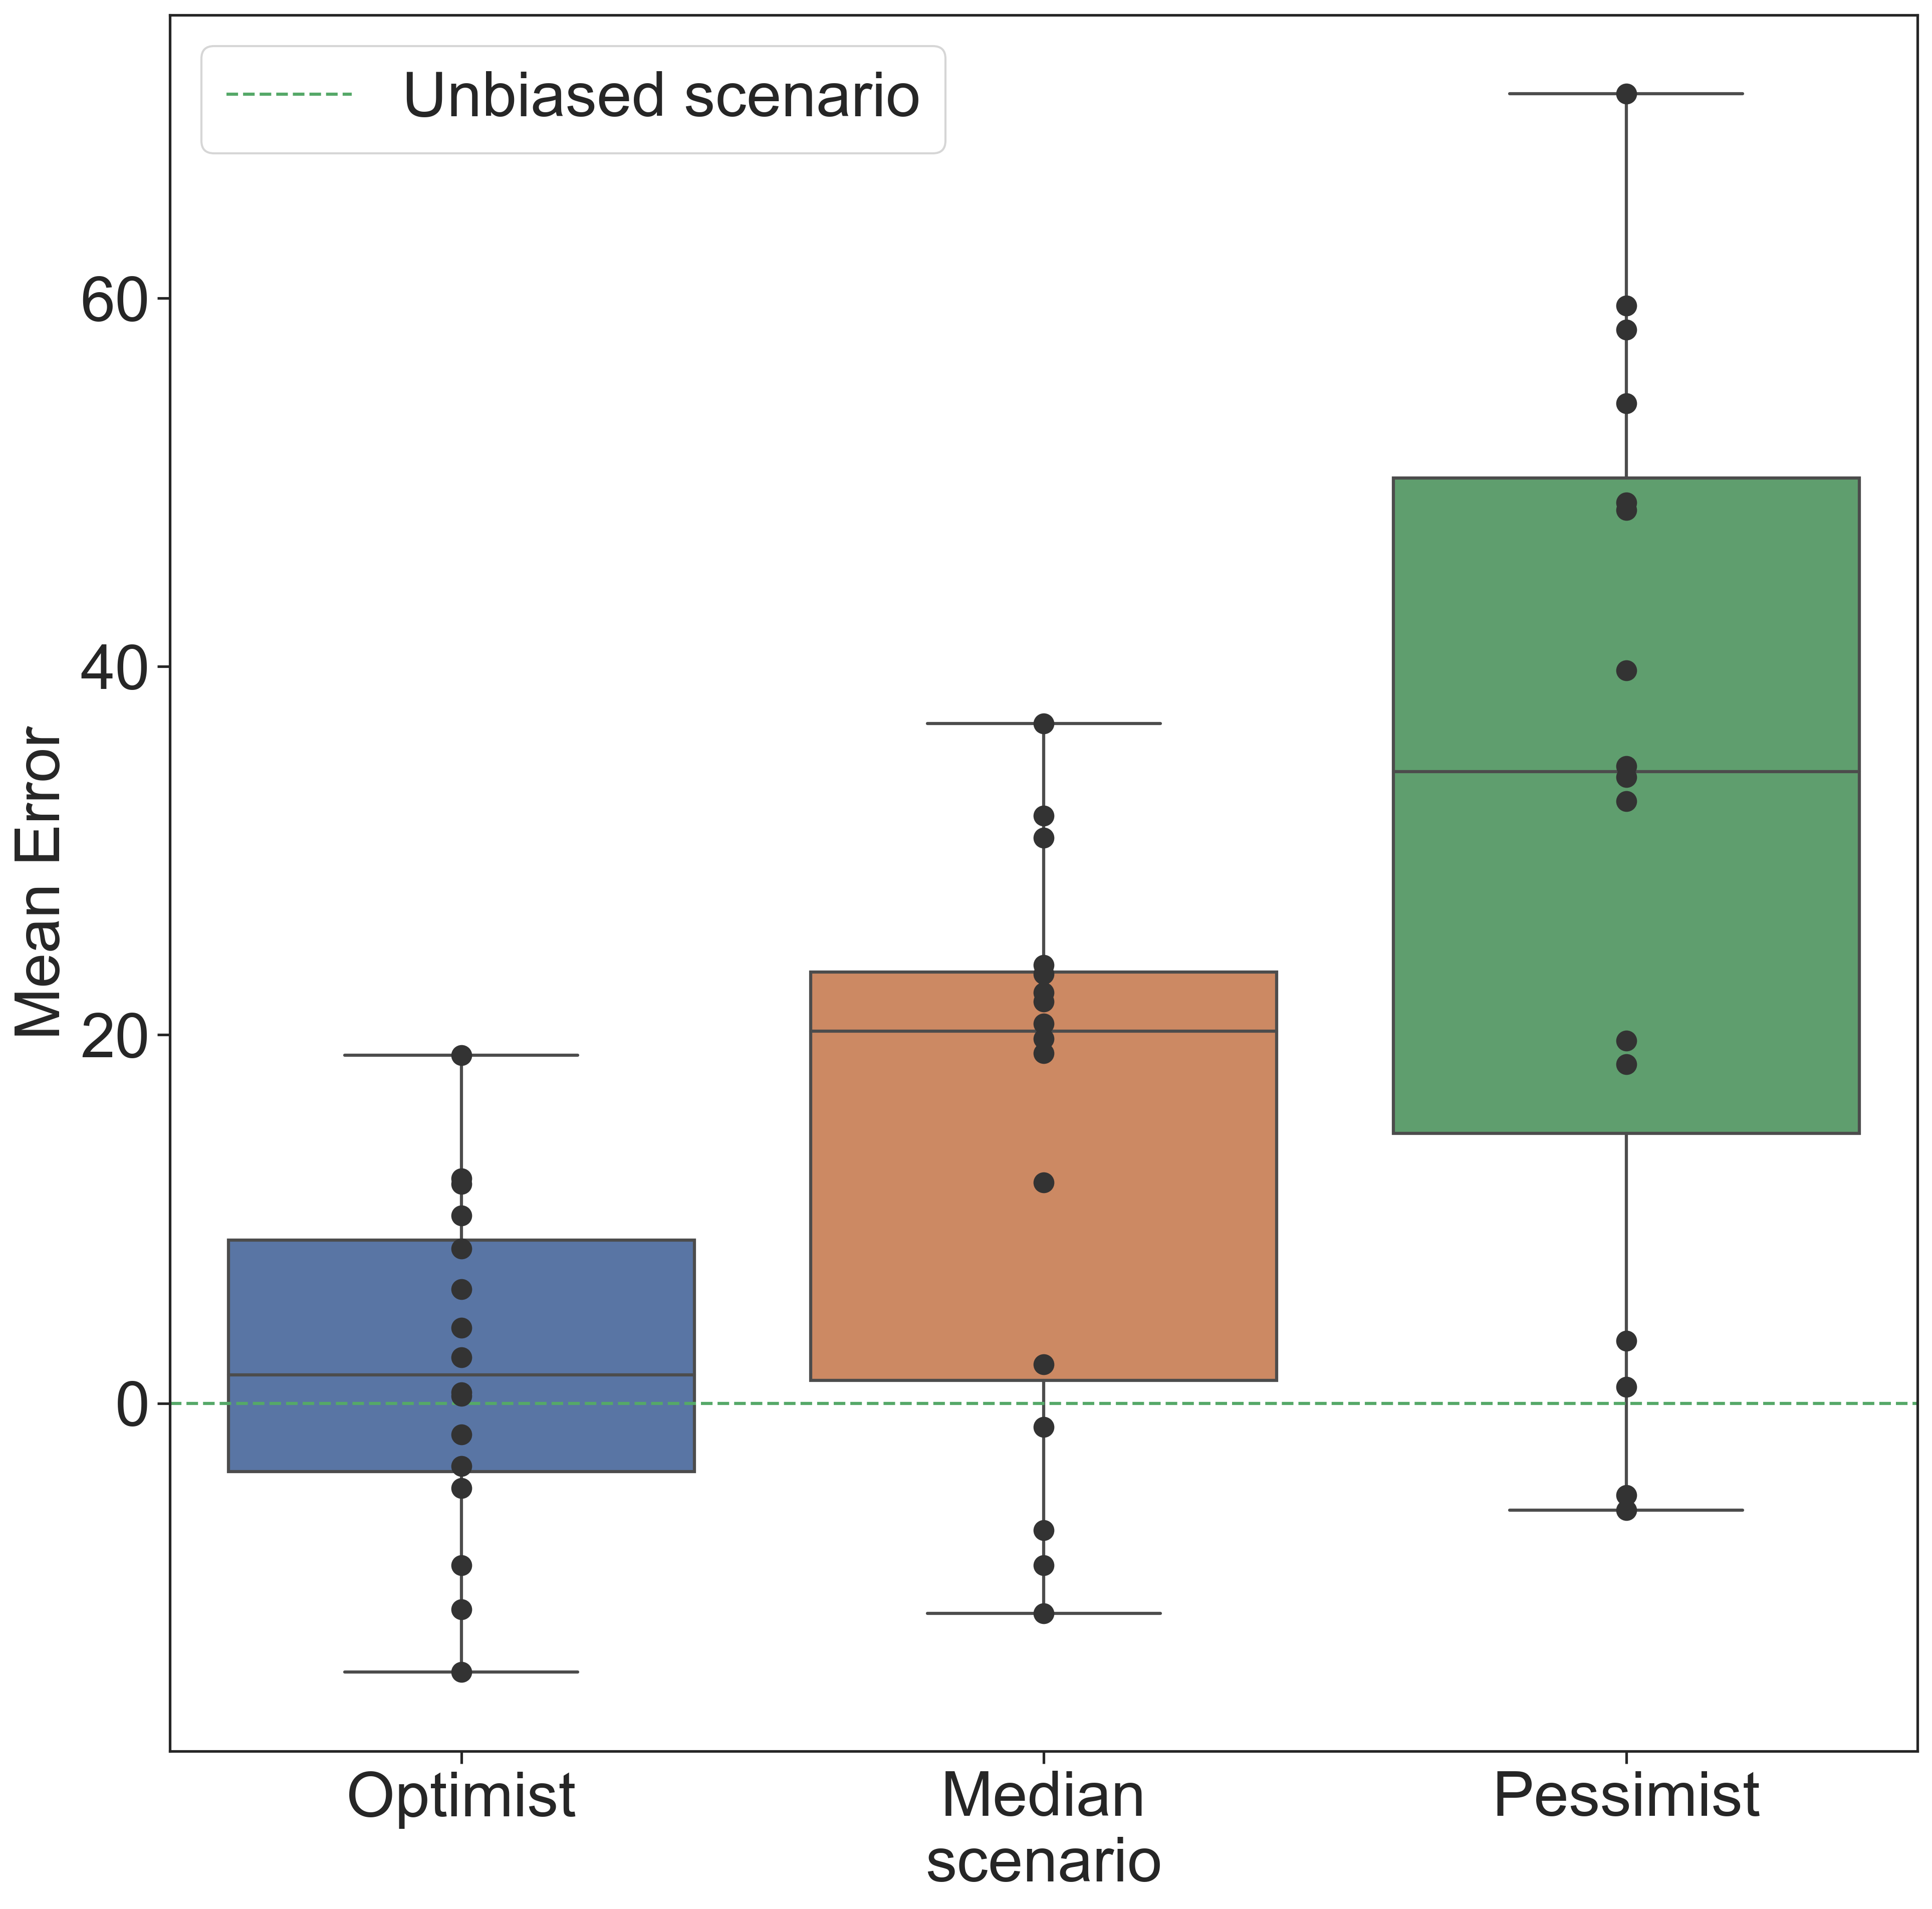

In [ ]:
display_df = pd.concat([df_low_scenario.assign(scenario='Optimist'), df_median_scenario.assign(scenario='Median'),
                        df_high_scenario.assign(scenario='Pessimist')], axis=0)
with open(results_path + 'mean_error.csv', 'w', encoding = 'utf-8-sig') as f:
    display_df.to_csv(f)
fig, ax = plt.subplots(figsize=(15, 15))
h = sns.boxplot(data=display_df, y="ME", x="scenario", ax=ax)
sns.stripplot(data=display_df, y="ME", x="scenario", ax=ax, s=10, color=".2", jitter=False)

ax.axhline(y=0, linestyle='--', c='g', label = 'Unbiased scenario')
ax.set_ylabel("Mean Error")
plt.legend()
fig_path = images_path + '/mean_error_scenario_type.pdf'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
